In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [27]:
df= pd.read_csv(r"C:\Users\Pavan Chodisetty\Downloads\globalpowerplantdatabasev120\global_power_plant_database.csv",na_filter=False)
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,,,...,http://globalenergyobservatory.org,GEODB,1009793,2017,,,,,,
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,,,...,http://globalenergyobservatory.org,GEODB,1009795,2017,,,,,,
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,,,...,http://globalenergyobservatory.org,GEODB,1009797,2017,,,,,,
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,,,...,http://globalenergyobservatory.org,GEODB,1009787,2017,,,,,,
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,,,...,http://globalenergyobservatory.org,GEODB,,2017,,,,,,


In [4]:
df=df.iloc[:,0:8]
df=df.drop(['country','gppd_idnr','latitude','longitude'],axis=1)
df.columns=['Country','Name','Capacity','Primary Fuel']
df.head()

,Country,Name,Capacity,Primary Fuel
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.00,Hydro
1,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.00,Hydro
2,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.00,Hydro
3,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,11.55,Hydro
4,Afghanistan,Northwest Kabul Power Plant Afghanistan,42.00,Gas


In [5]:
group1=df['Capacity'].groupby([df['Country'],df['Primary Fuel']]).sum()
group1

Country      Primary Fuel
Afghanistan  Gas                42.00
             Hydro             238.55
Albania      Hydro            1431.00
             Other              98.00
Algeria      Gas             15179.00
                               ...   
Zambia       Coal              300.00
             Hydro            2160.00
             Oil               169.60
Zimbabwe     Coal              920.00
             Hydro             750.00
Name: Capacity, Length: 649, dtype: float64

In [6]:
group2=group1.groupby(level=0).sum()
group2

Country
Afghanistan         280.550
Albania            1529.000
Algeria           15203.000
Angola             1071.180
Antarctica            7.600
                    ...    
Vietnam           39734.090
Western Sahara       23.400
Yemen              1045.000
Zambia             2641.837
Zimbabwe           1670.000
Name: Capacity, Length: 164, dtype: float64

Text(0.5, 1.0, 'Top 10 countries in power production')

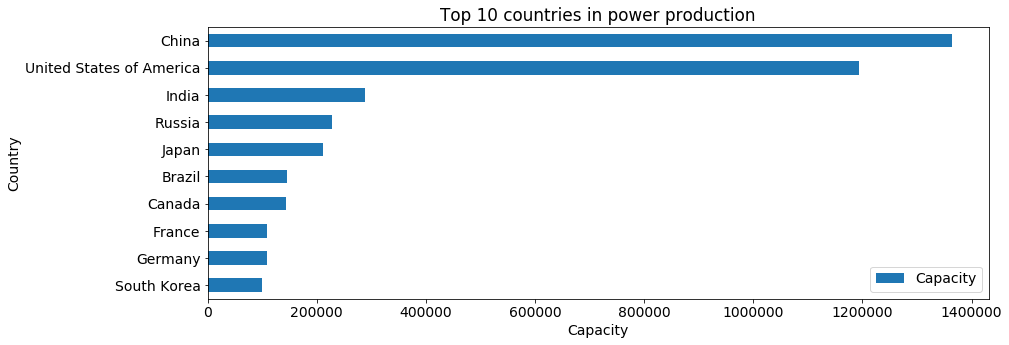

In [50]:
plt.figure(figsize=(14,5))
plt.rcParams.update({'font.size':14})
group2.nlargest(10).plot.barh()
plt.xlabel("Capacity")
plt.gca().invert_yaxis()
plt.legend()
plt.title("Top 10 countries in power production")

In [8]:
group3=group1.groupby(level=1).sum()
group3

Primary Fuel
Biomass           3.443570e+04
Coal              1.999520e+06
Cogeneration      4.002600e+03
Gas               1.472694e+06
Geothermal        1.256355e+04
Hydro             1.050385e+06
Nuclear           4.098269e+05
Oil               2.623560e+05
Other             3.757560e+03
Petcoke           2.497077e+03
Solar             6.372282e+04
Storage           4.536000e+02
Waste             1.510721e+04
Wave and Tidal    5.522000e+02
Wind              2.402036e+05
Name: Capacity, dtype: float64

Text(0.5, 1.0, 'Share of different Fuels in all countries')

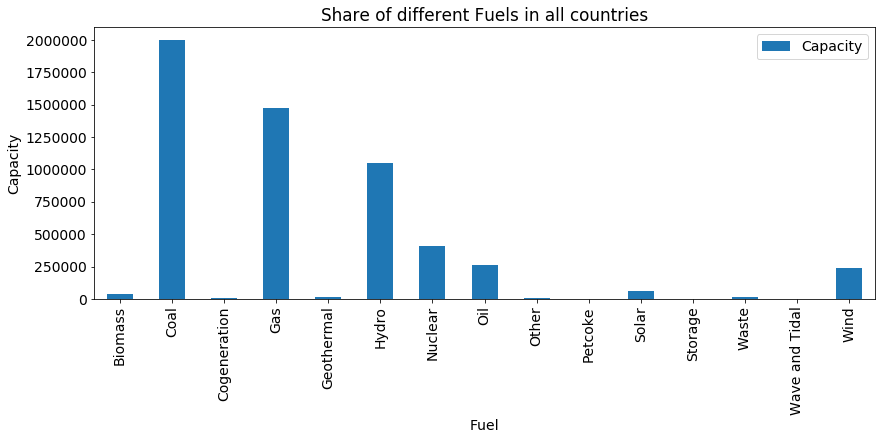

In [9]:
plt.figure(figsize=(14,5))
plt.rcParams.update({'font.size':14})
group3.plot.bar()
plt.xlabel('Fuel')
plt.ylabel("Capacity")
plt.legend()
plt.title("Share of different Fuels in all countries")

In [10]:
df2=df[df['Country']=='New Zealand']
df2

,Country,Name,Capacity,Primary Fuel
14598,New Zealand,Arapuni,192.00,Hydro
14599,New Zealand,Aratiatia,78.00,Hydro
14600,New Zealand,Atiamuri,74.00,Hydro
14601,New Zealand,Aviemore,220.00,Hydro
14602,New Zealand,Benmore,540.00,Hydro
14603,New Zealand,Clyde,432.00,Hydro
14604,New Zealand,Cobb,32.00,Hydro
14605,New Zealand,Coleridge,39.00,Hydro
14606,New Zealand,Hai Nui,7.00,Wind
14607,New Zealand,Highbank,29.00,Hydro


In [11]:
group4=df2['Capacity'].groupby(df2['Primary Fuel']).sum()
group4

Primary Fuel
Coal           500.00
Gas            507.00
Geothermal     666.00
Hydro         4388.00
Oil            155.00
Wind           458.55
Name: Capacity, dtype: float64

Text(0.5, 1.0, 'Energy Distribution of Newzealand')

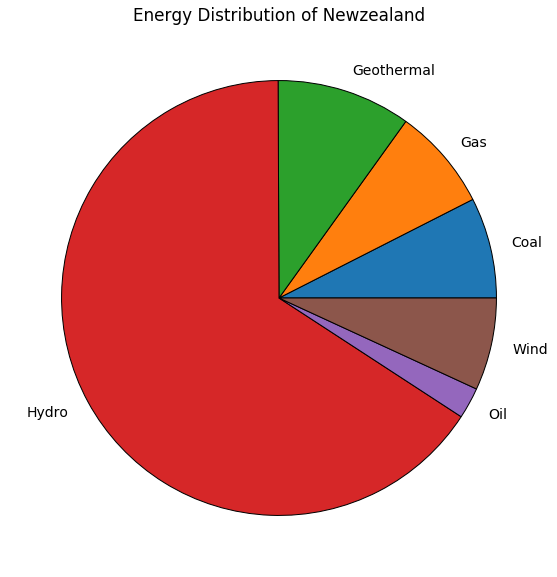

In [52]:
slices=group4.values
values=group4.index
plt.figure(figsize=(10,10))
plt.pie(slices,labels=values,wedgeprops={'edgecolor':'black'})
plt.title('Energy Distribution of Newzealand')

